#import, EDA, split, train

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score ,classification_report, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.inspection import (PartialDependenceDisplay, permutation_importance)
from sklearn.ensemble import AdaBoostClassifier
import graphviz
from sklearn.tree import export_graphviz


In [ ]:
df = pd.read_csv('train.csv')
print(df.shape)

(44720, 28)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44720 entries, 0 to 44719
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        44720 non-null  object 
 1   Customer_ID               44720 non-null  object 
 2   Month                     44720 non-null  object 
 3   Name                      40262 non-null  object 
 4   Age                       44720 non-null  object 
 5   SSN                       44720 non-null  object 
 6   Occupation                44720 non-null  object 
 7   Annual_Income             44720 non-null  object 
 8   Monthly_Inhand_Salary     38055 non-null  float64
 9   Num_Bank_Accounts         44719 non-null  float64
 10  Num_Credit_Card           44719 non-null  float64
 11  Interest_Rate             44719 non-null  float64
 12  Num_of_Loan               44719 non-null  object 
 13  Type_of_Loan              39664 non-null  object 
 14  Delay_

In [ ]:
df.isna().sum

<bound method DataFrame.sum of           ID  Customer_ID  Month   Name    Age    SSN  Occupation  \
0      False        False  False  False  False  False       False   
1      False        False  False  False  False  False       False   
2      False        False  False  False  False  False       False   
3      False        False  False  False  False  False       False   
4      False        False  False  False  False  False       False   
...      ...          ...    ...    ...    ...    ...         ...   
44715  False        False  False  False  False  False       False   
44716  False        False  False  False  False  False       False   
44717  False        False  False  False  False  False       False   
44718  False        False  False  False  False  False       False   
44719  False        False  False  False  False  False       False   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0              False                  False              False  ...   
1              False                   True              False  ...   
2              False                   True              False  ...   
3              False                   True              False  ...   
4              False                  False              False  ...   
...              ...                    ...                ...  ...   
44715          False                  False              False  ...   
44716          False                  False              False  ...   
44717          False                   True              False  ...   
44718          False                  False              False  ...   
44719          False                   True               True  ...   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0           False             False                     False   
1           False             False                     False   
2           False             False                     False   
3           False             False                     False   
4           False             False                     False   
...           ...               ...                       ...   
44715       False             False                     False   
44716       False             False                     False   
44717       False             False                     False   
44718       False             False                     False   
44719        True              True                      True   

       Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                   False                  False                False   
1                    True                  False                False   
2                   False                  False                False   
3                   False                  False                False   
4                   False                  False                False   
...                   ...                    ...                  ...   
44715               False                  False                False   
44716               False                  False                False   
44717               False                  False                False   
44718               False                  False                False   
44719                True                   True                 True   

       Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
0                        False              False            False   
1                        False              False            False   
2                        False              False            False   
3                        False              False            False   
4                        False              False            False   
...                        ...                ...              ...   
44715                    False              False            False   
44716                    False              False            False   

drop unwanted columns (name)

In [ ]:
df = df.drop(['Name'], axis=1)

In [ ]:
df = df.dropna(how='any')

In [ ]:
df.isna().sum()


,0
ID,0
Customer_ID,0
Month,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0


In [ ]:
df.shape

(26392, 27)

categories of Credit_Score

In [ ]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

drop unwanted coulmns

In [ ]:
columns =  ["ID", "Customer_ID", "SSN"]
df = df.drop(columns=columns)


Clean non numric characters and convert column to numeric type coercing invalid values to NaN

In [ ]:
numeric_columns = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
                "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace("[^0-9.]", "", regex=True), errors='coerce')

In [ ]:
df = df.dropna(how='any')
df.isna().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


Split Data for Training

In [ ]:
target_col = 'Credit_Score'
y = df[target_col]
X = df.select_dtypes(exclude=['object'])

y_encoded = pd.get_dummies(y)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=True
)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Validation: {X_val.shape}, {y_val.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (15501, 16), (15501, 3)
Validation: (5167, 16), (5167, 3)
Test: (5167, 16), (5167, 3)


In [ ]:
X_train.isna().sum()

,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


# Paper1

ref: https://link.springer.com/article/10.1007/s00521-019-04537-7#Sec11

##Decision Tree

train

In [ ]:
y_train_labels = y_train.idxmax(axis=1)
y_val_labels = y_val.idxmax(axis=1)
y_test_labels = y_test.idxmax(axis=1)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train_labels)

DecisionTreeClassifier(random_state=42)


Prediction and Evaluation


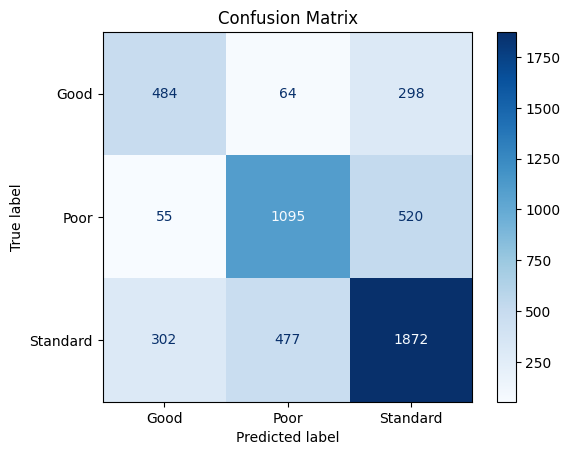

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test_labels, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted')
recall = recall_score(y_test_labels, y_pred, average='weighted')
f1 = f1_score(y_test_labels, y_pred, average='weighted')

print("Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))


Evaluation Metrics:
Accuracy:  0.6534
Precision: 0.6487
Recall:    0.6534
F1 Score:  0.6503

Classification Report:
              precision    recall  f1-score   support

        Good       0.51      0.42      0.46       846
        Poor       0.67      0.70      0.68      1670
    Standard       0.68      0.70      0.69      2651

    accuracy                           0.65      5167
   macro avg       0.62      0.61      0.61      5167
weighted avg       0.65      0.65      0.65      5167



###Decision Path for a Single Prediction

In [ ]:
from sklearn.tree import export_text
from sklearn.tree import plot_tree


In [ ]:
print(export_text(clf, feature_names=list(X.columns)))

|--- Outstanding_Debt <= 1498.05
|   |--- Num_of_Delayed_Payment <= 7.50
|   |   |--- Delay_from_due_date <= 15.50
|   |   |   |--- Num_Credit_Card <= 2.50
|   |   |   |   |--- Changed_Credit_Limit <= 7.64
|   |   |   |   |   |--- Changed_Credit_Limit <= 6.27
|   |   |   |   |   |   |--- Interest_Rate <= 8.50
|   |   |   |   |   |   |   |--- Age <= 19.50
|   |   |   |   |   |   |   |   |--- Total_EMI_per_month <= 23.41
|   |   |   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |   |   |--- Total_EMI_per_month >  23.41
|   |   |   |   |   |   |   |   |   |--- class: Standard
|   |   |   |   |   |   |   |--- Age >  19.50
|   |   |   |   |   |   |   |   |--- Outstanding_Debt <= 1221.71
|   |   |   |   |   |   |   |   |   |--- Total_EMI_per_month <= 28.07
|   |   |   |   |   |   |   |   |   |   |--- Monthly_Balance <= 205.63
|   |   |   |   |   |   |   |   |   |   |   |--- class: Standard
|   |   |   |   |   |   |   |   |   |   |--- Monthly_Balance >  205.63
|   |   |   |

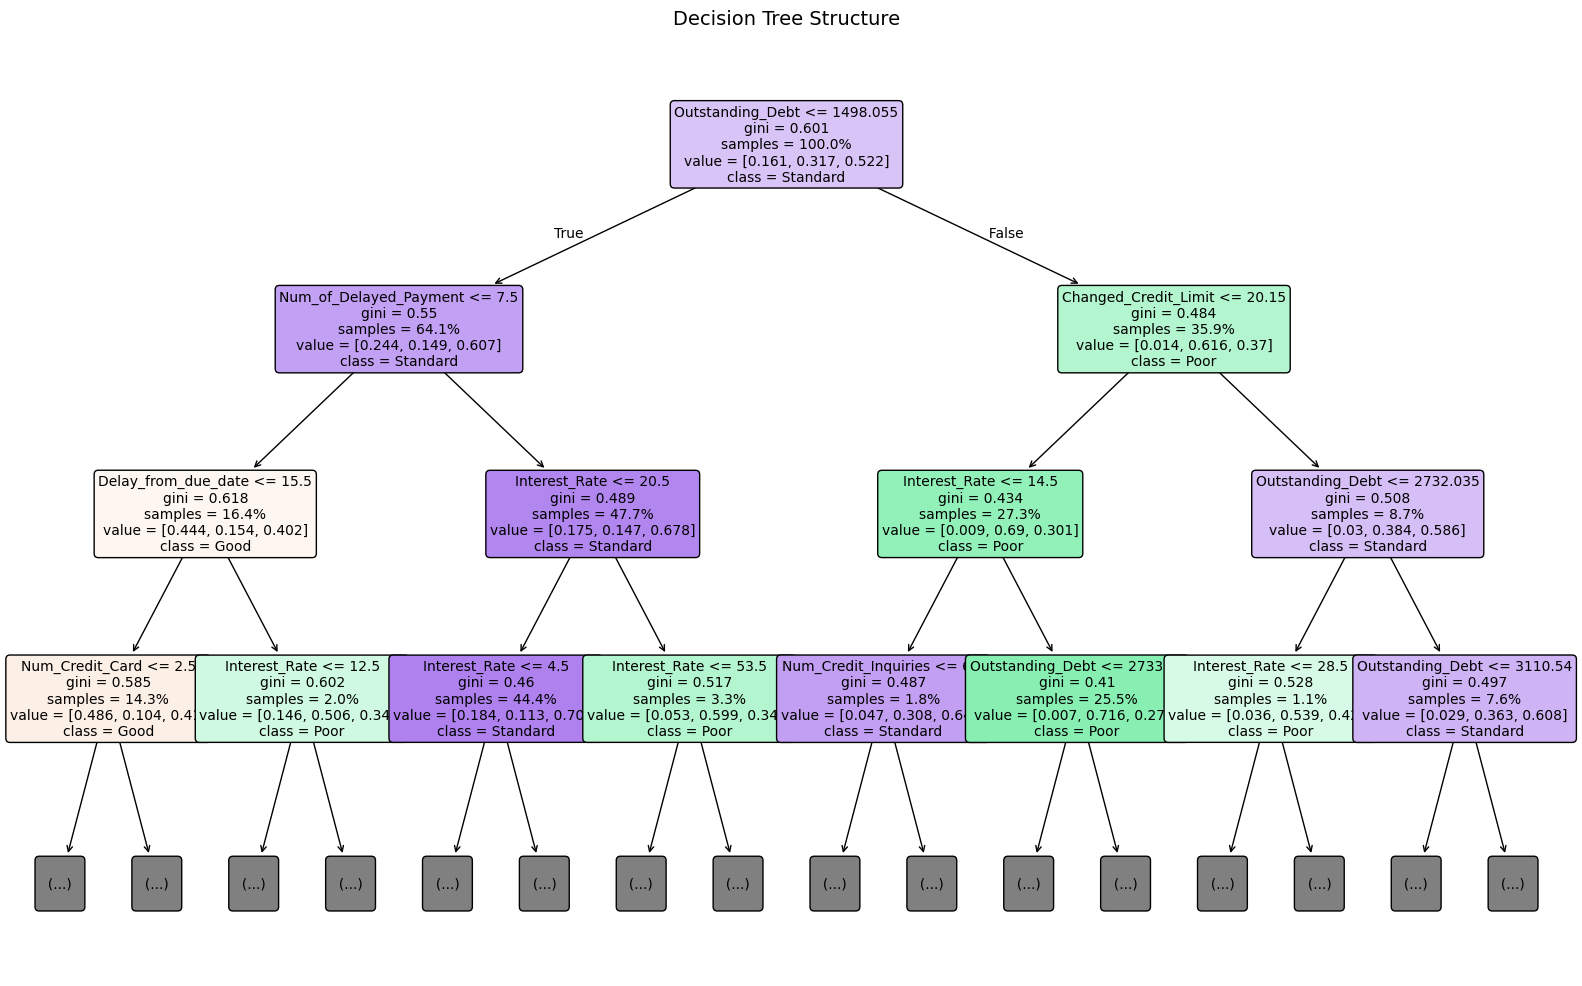

In [ ]:
plt.figure(figsize=(20, 12))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=y_encoded.columns if hasattr(y_encoded, 'columns') else None,
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10,
    max_depth=3
)
plt.title("Decision Tree Structure", pad=20, fontsize=14)
plt.show()

###Decision Tree Feature Importance

Text(0.5, 1.0, 'Decision Tree Feature Importance')

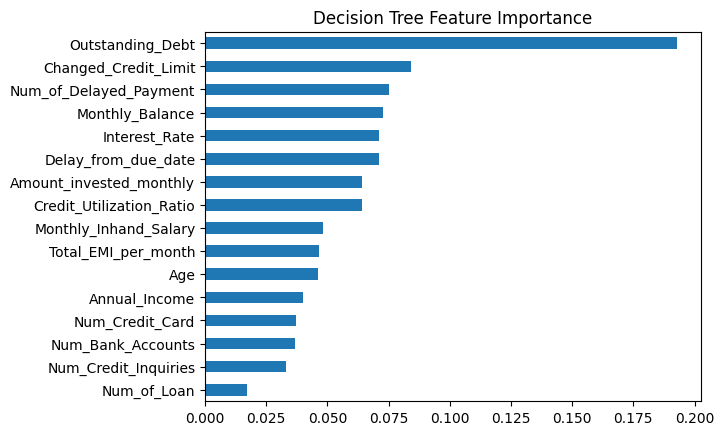

In [ ]:
pd.Series(clf.feature_importances_, index=X.columns).sort_values().plot(kind='barh')
plt.title("Decision Tree Feature Importance")

###SHAP Approach

use TreeExplainer with probabilities

use TreeExplainer with probabilities solving a multi-class classification problem that ensures SHAP explains the class probabilities which are interpretable

In [ ]:
explainer = shap.Explainer(clf, X_train, model_output='probability')
shap_values = explainer(X_test)

 93%|=================== | 14458/15501 [00:20<00:01]       

In [ ]:
print(type(shap_values))
print(shap_values.shape)
print(shap_values.values.shape)
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

<class 'shap._explanation.Explanation'>
(5167, 16, 3)
(5167, 16, 3)


Plot SHAP summary

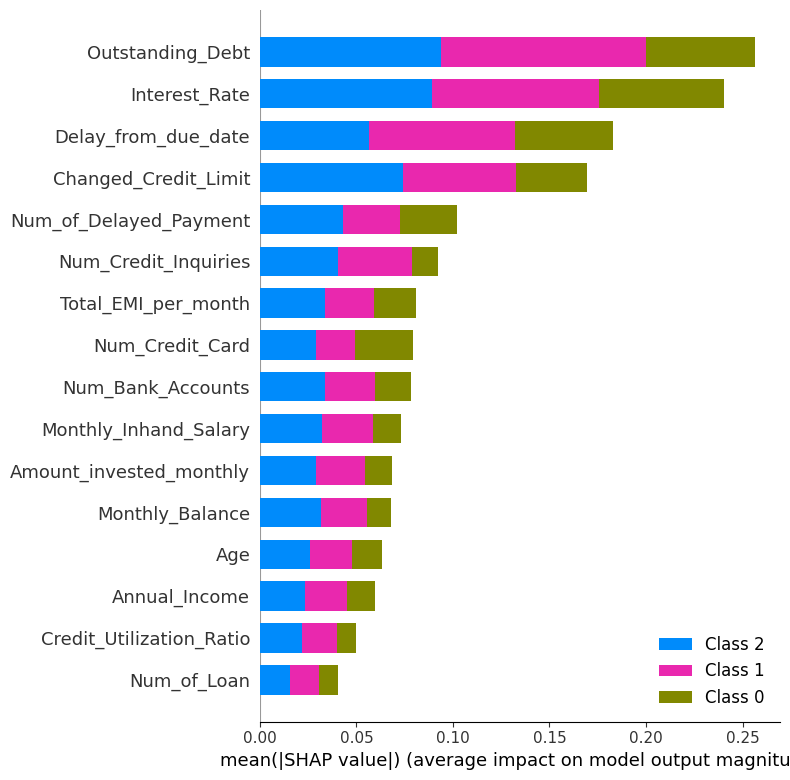

In [ ]:
shap.summary_plot(shap_values, X_test_df)

###Global Surrogate Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

Create and fit surrogate model

In [ ]:
surrogate = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_preds = clf.predict(X_train)
surrogate.fit(X_train, clf_preds)


DecisionTreeClassifier(max_depth=3, random_state=42)

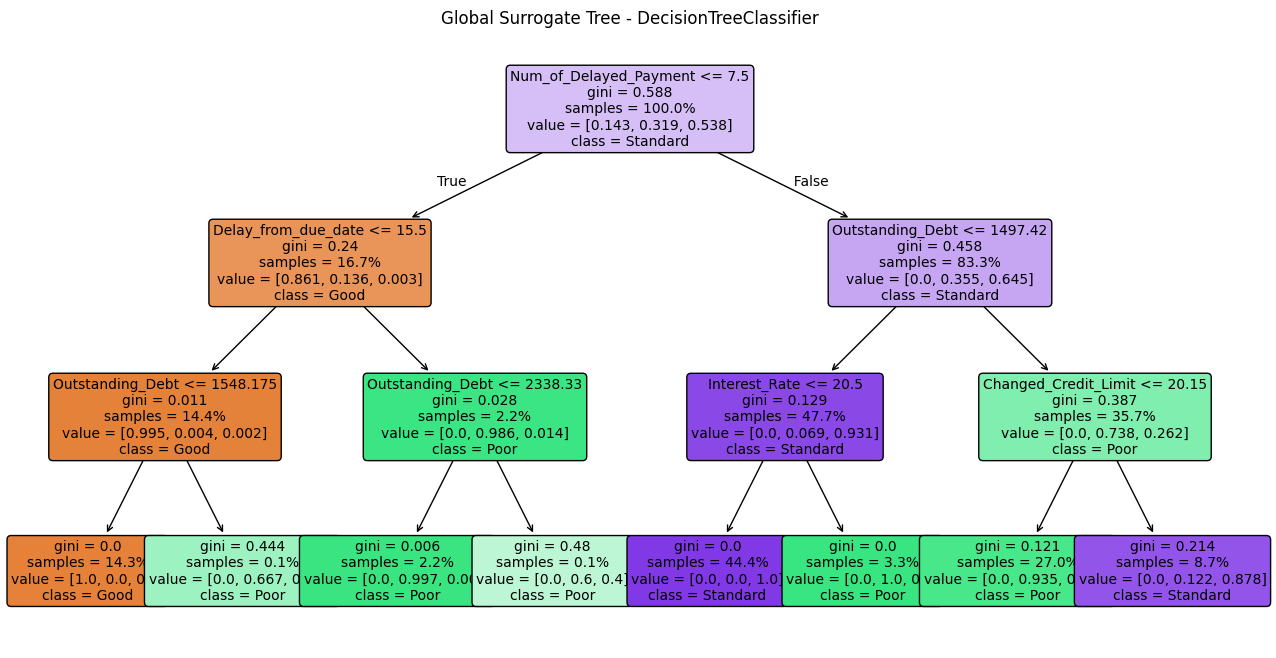

In [ ]:
plt.figure(figsize=(16, 8))
plot_tree(surrogate,
          feature_names=X_train.columns,
          class_names=[str(c) for c in surrogate.classes_],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)
plt.title("Global Surrogate Tree - DecisionTreeClassifier")
plt.show()


classification interpretation

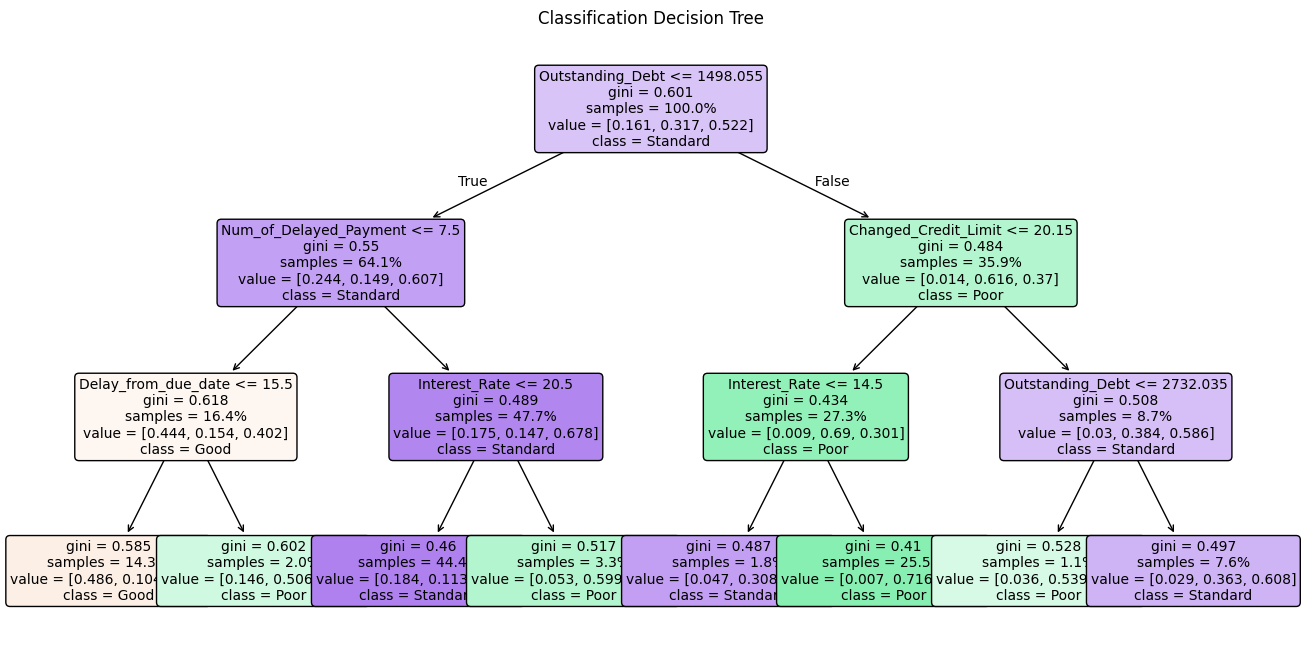

In [ ]:
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_labels = y_train.idxmax(axis=1)
    y_val_labels = y_val.idxmax(axis=1)
    y_test_labels = y_test.idxmax(axis=1)
else:
    y_train_labels = y_train
    y_val_labels = y_val
    y_test_labels = y_test

clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train_labels)

plt.figure(figsize=(16, 8))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=[str(c) for c in clf.classes_],
          filled=True,
          rounded=True,
          proportion=True,
          fontsize=10)
plt.title("Classification Decision Tree")
plt.show()


eval

In [ ]:
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))


Classification Report:
              precision    recall  f1-score   support

        Good       0.51      0.42      0.46       846
        Poor       0.67      0.70      0.68      1670
    Standard       0.68      0.70      0.69      2651

    accuracy                           0.65      5167
   macro avg       0.62      0.61      0.61      5167
weighted avg       0.65      0.65      0.65      5167



###LIME

In [ ]:
!pip install lime shap scikit-learn numpy pandas matplotlib tensorflow pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1f950cb563bd7fea5ff00c413cd106652d714cc5a56b4e470ec3ce0a0ea0d661
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd


In [ ]:
print("y_train shape:", y_train.shape)
print("y_train sample:\n", y_train[:5])

y_train shape: (15501, 3)
y_train sample:
         Good   Poor  Standard
6344   False   True     False
29862   True  False     False
25225  False  False      True
12372  False  False      True
21382  False  False      True


In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train.values, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
if len(y_train.shape) > 1: #convert to 1D array of class labels
    print("\nConverting multi-format y to class labels...")
    y_train = np.argmax(y_train, axis=1) if y_train.shape[1] > 1 else y_train.flatten()
    print("New y_train shape:", y_train.shape)

Ensure X_train and X_test are properly formatted

In [ ]:
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=X_train.columns)

train

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train.values, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
test_sample = X_test.iloc[0:1].values
print("\nModel test prediction shape:", dt.predict_proba(test_sample).shape)
print("Model classes:", dt.classes_)



Model test prediction shape: (1, 3)
Model classes: [0 1 2]


  prediction wrapper (for both 2D and 3D output cases)


In [ ]:
def predict_proba_wrapper(x):
    probs = dt.predict_proba(x)
    if len(probs.shape) == 3:
        probs = np.mean(probs, axis=0)
    return probs

explainer

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=[str(c) for c in dt.classes_],
    mode='classification',
    random_state=42
)
instance_idx = 5
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_idx].values,
    predict_fn=predict_proba_wrapper,
    num_features=5
)

exp.show_in_notebook(show_table=True)